In [87]:
import os
wsl_path = r"\\wsl$\Ubuntu\home\lorentsen"
filename = [filename for filename in os.listdir(wsl_path) if filename.startswith("output")]
filename

['output_SIR_dt_0.010000_tot_100.000000.csv',
 'output_SIR_dt_0.000100_tot_100.000000.csv',
 'output_SIR_dt_0.000200_tot_100.000000.csv',
 'output_SIR_dt_0.020000_tot_100.000000.csv',
 'output_SIR_dt_2.000000_tot_100.000000.csv',
 'output_SIR_dt_0.001000_tot_100.000000.csv',
 'output_SIR_dt_0.100000_tot_100.000000.csv',
 'output_SIR_dt_0.002000_tot_100.000000.csv',
 'output_SIR_dt_0.200000_tot_100.000000.csv',
 'output_SIR_dt_1.000000_tot_100.000000.csv']

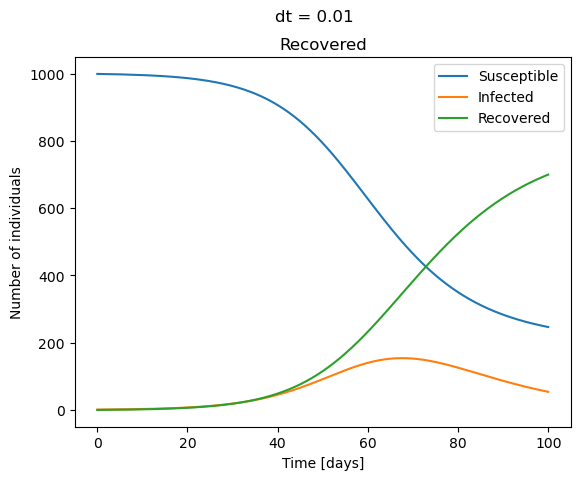

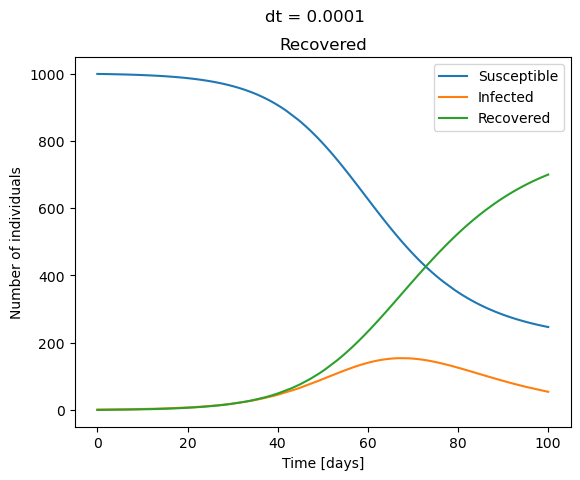

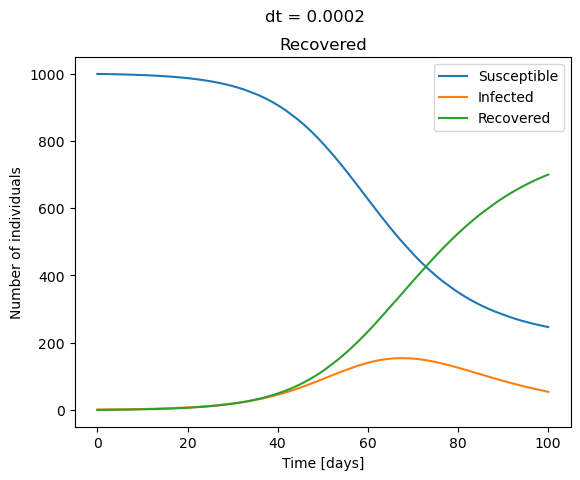

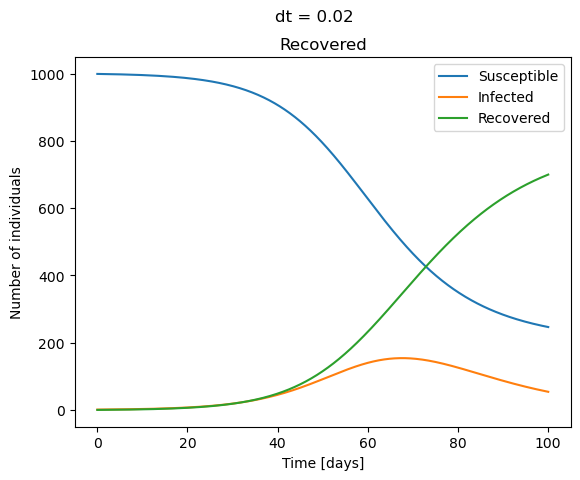

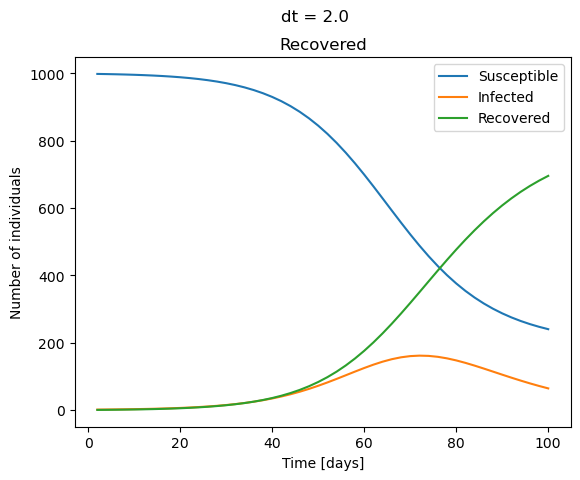

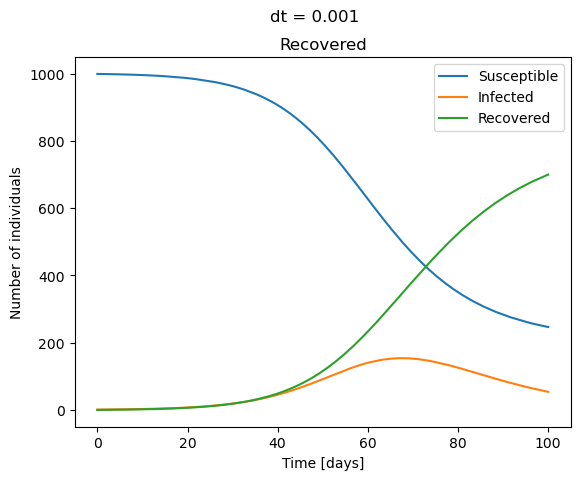

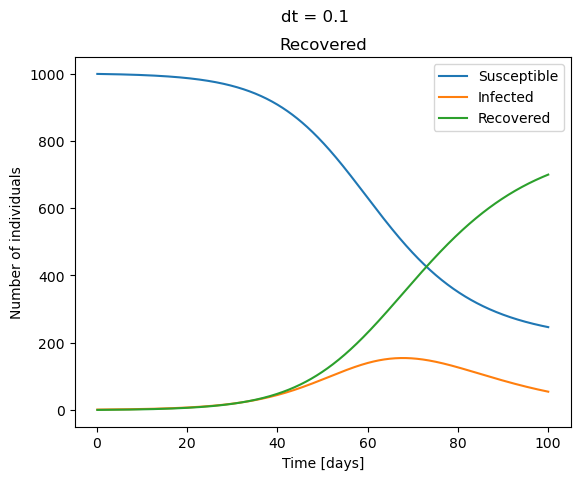

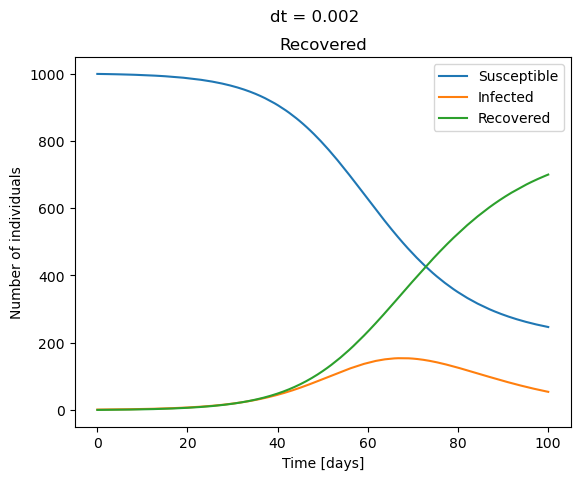

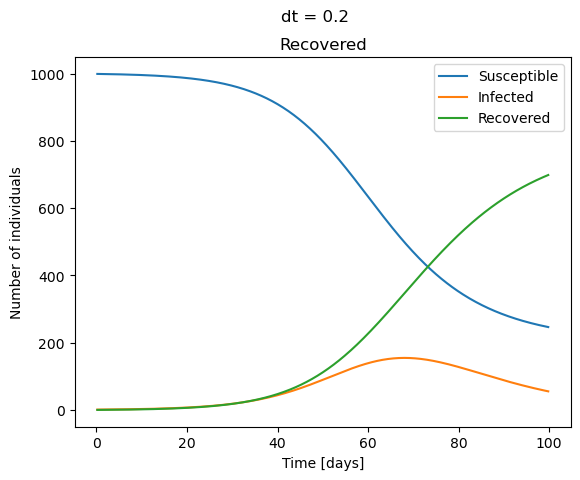

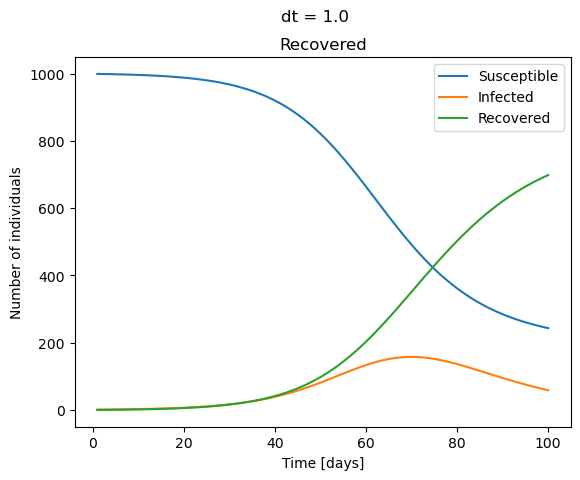

In [88]:
import numpy as np
import matplotlib.pyplot as plt
for i in range(len(filename)):
    data = np.loadtxt(os.path.join(wsl_path, filename[i]), delimiter=",", skiprows=1)
    header = open(os.path.join(wsl_path, filename[i]), 'r').readline().strip().split(",")
    dt = float(filename[i].split("dt_")[1].split("_")[0])
    # print(header)
    fig, axs = plt.subplots(1)
    fig.suptitle(f'dt = {dt}')

    for j in range(3):
        axs.plot(data[:, 3], data[:, j], label=header[j])
        axs.set_title(header[j])
        axs.set_xlabel("Time [days]")
        axs.set_ylabel("Number of individuals")
    axs.legend()
    plt.show()

In [89]:
np.arange(1, 10)[:-1]

array([1, 2, 3, 4, 5, 6, 7, 8])

C:\Users\lorentsen\AppData\Local\Temp\ipykernel_43704\3727134968.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


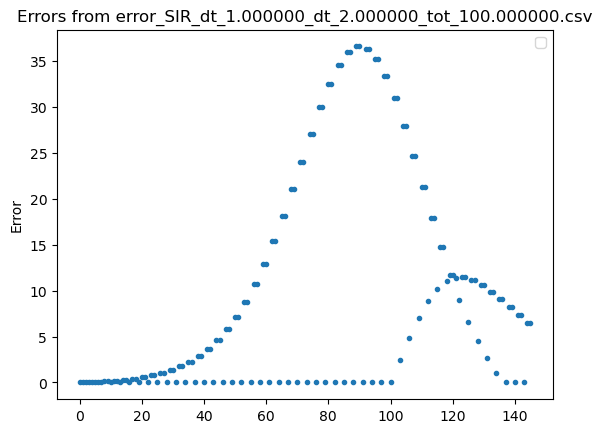

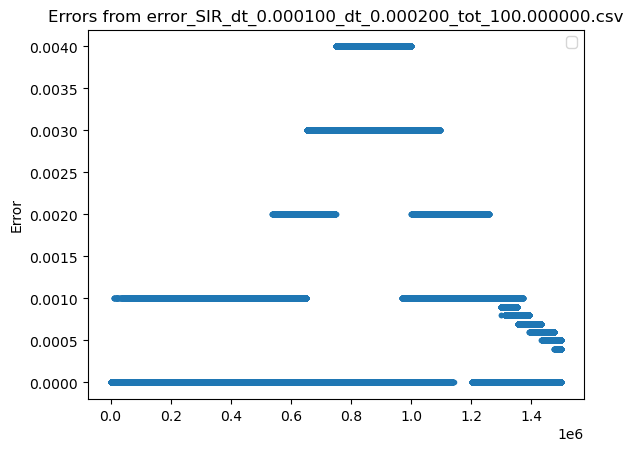

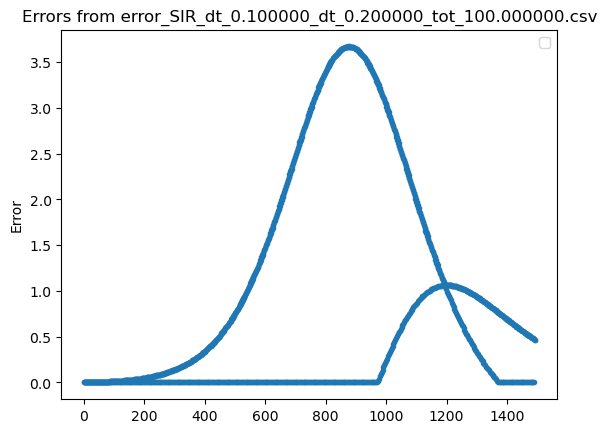

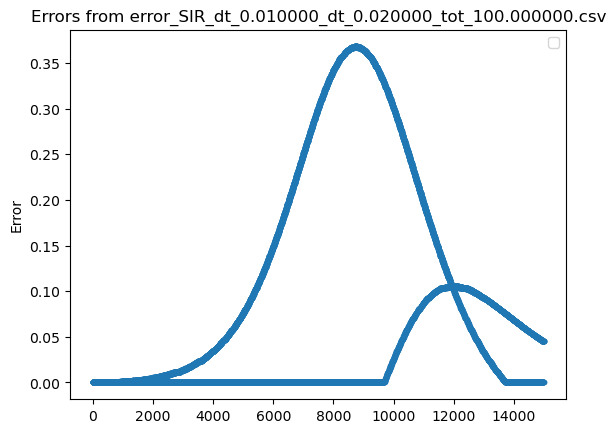

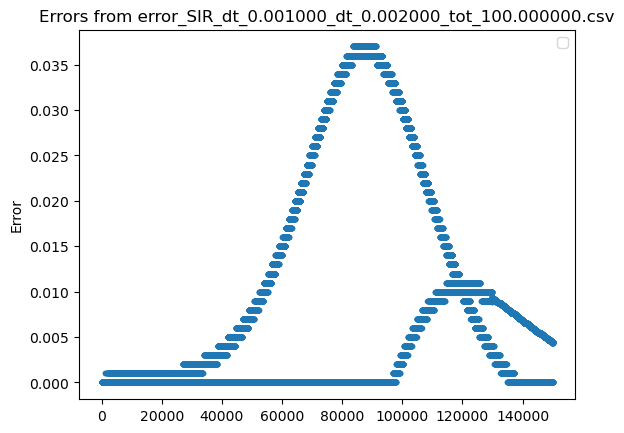

In [92]:
filename_errors = [filename for filename in os.listdir(wsl_path) if filename.startswith("error")]
# type(data[0])
max_error = []
dt_values = []
for file in filename_errors:
    # for i in range(data.shape):
    data = np.genfromtxt(os.path.join(wsl_path, file), delimiter=",")
    plt.plot(data[:-5], '.')#, label=f'Error column {0}')
    # plt.xlabel("Time [days]")
    plt.ylabel("Error")
    plt.title(f'Errors from {file}')
    plt.legend()
    plt.show()
    max_error.append(np.max(data[:-5]))
    dt_values.append(float(file.split("dt_")[2].split("_")[0]))
# # data

[2.0, 0.0002, 0.2, 0.02, 0.002]

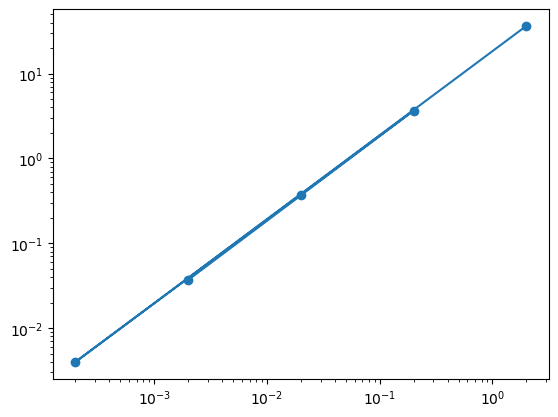

In [91]:
fig, ax = plt.subplots()
ax.set(xscale = "log", yscale = "log")
ax.scatter(dt_values, max_error)
ax.plot(dt_values, max_error)
dt_values